In [1]:
import math
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
#import matplotlib.gridspec as GridSpec
from matplotlib import gridspec

In [2]:
# Definindo stilo
sns.set_style('darkgrid')

# Importando dados do GitHub 
url = 'https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true'

dados = pd.read_csv(url, sep = ',')

## Verificando base de dados

In [3]:
dados.shape

(127380, 136)

In [4]:
# dados.columns()
dados.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [5]:
# Verificando valores nulos
dados.isnull().sum().sort_values(ascending = True)

NU_INSCRICAO                  0
CO_UF_PROVA                   0
NO_MUNICIPIO_PROVA            0
CO_MUNICIPIO_PROVA            0
IN_NOME_SOCIAL                0
                          ...  
TP_DEPENDENCIA_ADM_ESC    98753
TP_LOCALIZACAO_ESC        98753
TP_SIT_FUNC_ESC           98753
NO_MUNICIPIO_ESC          98753
CO_UF_ESC                 98753
Length: 136, dtype: int64

## Desafios Aula 01

Desafio01: Proporção dos inscritos por idade.

Desafio02: Descobrir de quais estados são os inscritos com 13 anos.

Desafio03: Adicionar título no gráfico

Desafio04: Plotar os Histogramas das idades dos do treineiro e não treineiros.

Desafio05: Comparar as distribuições das provas em inglês espanhol

Desafio06: Explorar a documentações e visualizações com matplotlib ou pandas e gerar novas visualizações.

In [6]:
# Desafio01: Proporção dos inscritos por idade.
dados.NU_IDADE.value_counts(normalize = True) * 100

18    16.840948
17    16.687078
19    11.318888
20     8.174753
16     6.146962
        ...    
75     0.001570
73     0.001570
82     0.000785
77     0.000785
76     0.000785
Name: NU_IDADE, Length: 65, dtype: float64

In [7]:
# Desafio02: Descobrir de quais estados são os inscritos com 13 anos.
dados.loc[dados.NU_IDADE == 13, 'SG_UF_RESIDENCIA'].unique()

array(['SP', 'MT', 'AP', 'BA'], dtype=object)

In [8]:
# Desafio02: Descobrir de quais estados são os inscritos com 13 anos.
dados.loc[dados.NU_IDADE == 13, 'SG_UF_RESIDENCIA'].value_counts()

AP    1
MT    1
BA    1
SP    1
Name: SG_UF_RESIDENCIA, dtype: int64

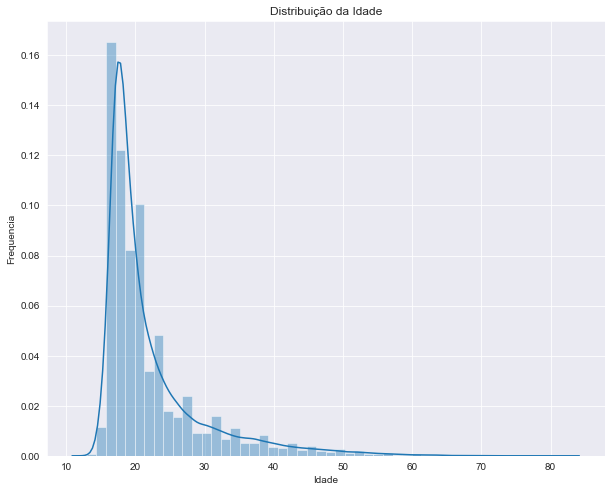

In [9]:
# Desafio03: Adicionar título no gráfico
plt.figure(figsize = (10, 8))
sns.distplot(dados.NU_IDADE, axlabel = 'Idade').set_title('Distribuição da Idade')
plt.ylabel("Frequencia")
plt.show()

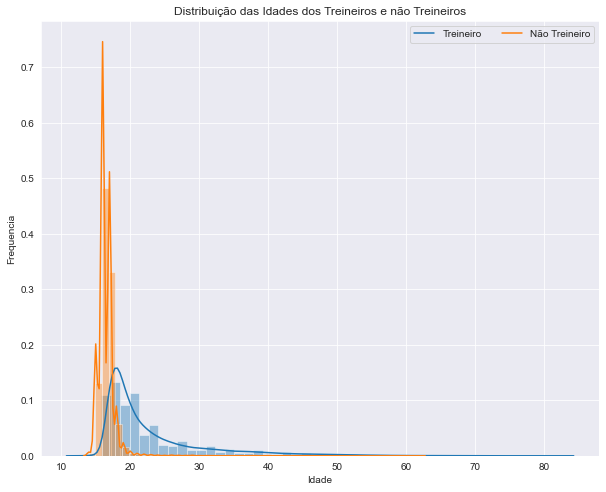

In [10]:
# Desafio04: Plotar os Histogramas das idades dos do treineiro e não treineiros.
plt.figure(figsize = (10,8))
sns.distplot(dados.loc[dados.IN_TREINEIRO == 0, 'NU_IDADE'], hist = True)
sns.distplot(dados.loc[dados.IN_TREINEIRO == 1, 'NU_IDADE'], hist = True)
plt.title('Distribuição das Idades dos Treineiros e não Treineiros')
plt.legend(labels = ['Treineiro','Não Treineiro'], ncol = 2, loc = 'upper right')
plt.xlabel('Idade')
plt.ylabel('Frequencia')
plt.show()

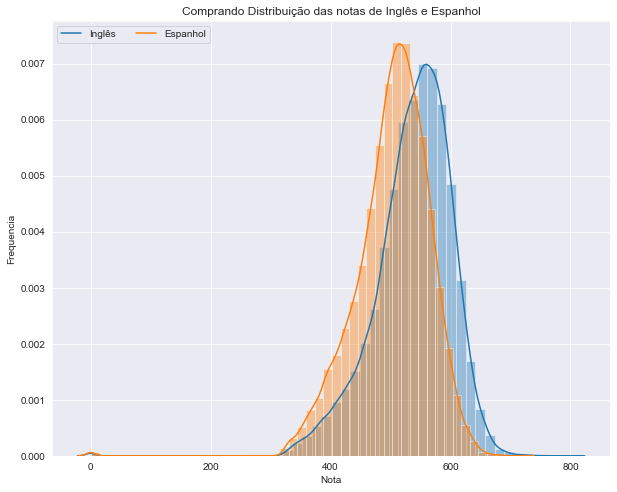

In [11]:
# Desafio05: Comparar as distribuições das provas em inglês espanhol
plt.figure(figsize = (10,8))
sns.distplot(dados.loc[dados.TP_LINGUA == 0, 'NU_NOTA_LC'], hist = True)
sns.distplot(dados.loc[dados.TP_LINGUA == 1, 'NU_NOTA_LC'], hist = True)
plt.title('Comprando Distribuição das notas de Inglês e Espanhol')
plt.legend(labels = ['Inglês','Espanhol'], ncol = 2, loc = 'upper left')
plt.xlabel('Nota')
plt.ylabel('Frequencia')
plt.show()

In [12]:
# Desafio06: Explorar a documentações e visualizações com matplotlib ou pandas e gerar novas visualizações.
dados['TP_SEXO'] = dados['TP_SEXO'].map({'F':'Feminino', 'M':'Masculino'})
dados['TP_COR_RACA'] = dados['TP_COR_RACA'].map({0:'NA', 6:'NA', 1:'Branca', 2:'Preta', 3:'Parda', 4:'Amarela', 5:'Indígena'})

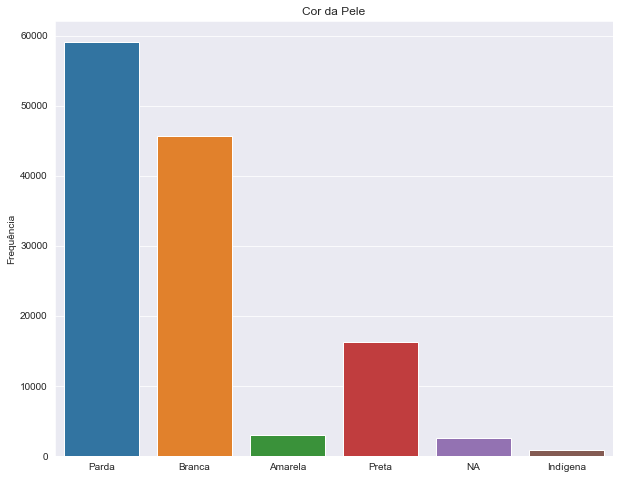

In [13]:
# Análisando cor da pele
plt.figure(figsize = (10, 8))
sns.countplot(dados.TP_COR_RACA).set_title("Cor da Pele")
plt.xlabel("")
plt.ylabel("Frequência")
plt.show()

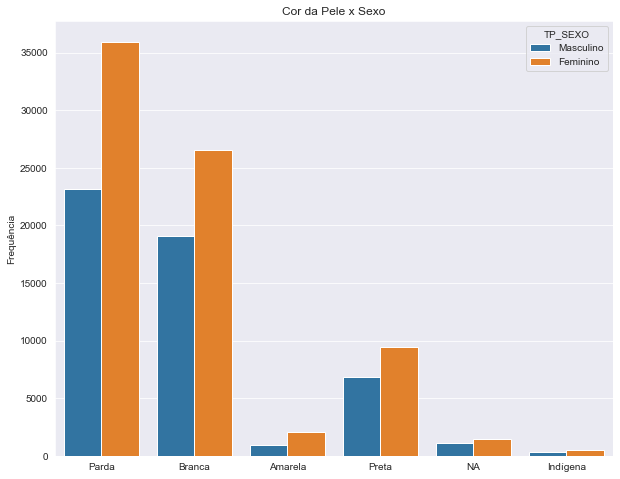

In [14]:
# Análisando cor da pele x sexo
plt.figure(figsize = (10, 8))
sns.countplot(dados.TP_COR_RACA, hue = dados.TP_SEXO).set_title("Cor da Pele x Sexo")
plt.xlabel("")
plt.ylabel("Frequência")
plt.show()

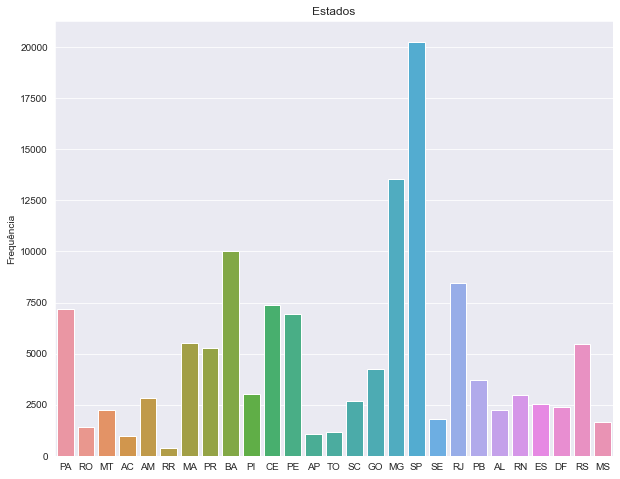

In [15]:
# Análisando UF
plt.figure(figsize = (10, 8))
sns.countplot(dados.SG_UF_RESIDENCIA).set_title("Estados")
plt.xlabel("")
plt.ylabel("Frequência")
plt.show()

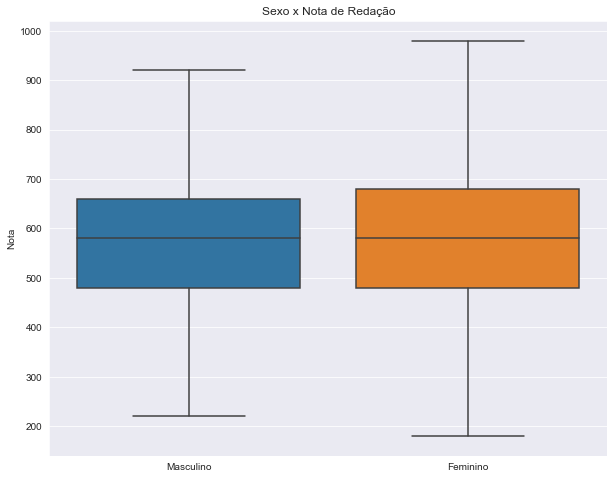

In [16]:
# Análisando nota da redação
plt.figure(figsize = (10, 8))
sns.boxplot(x = dados.TP_SEXO, y = dados.NU_NOTA_REDACAO, showfliers = False).set_title("Sexo x Nota de Redação")
plt.xlabel("")
plt.ylabel("Nota")
plt.show()

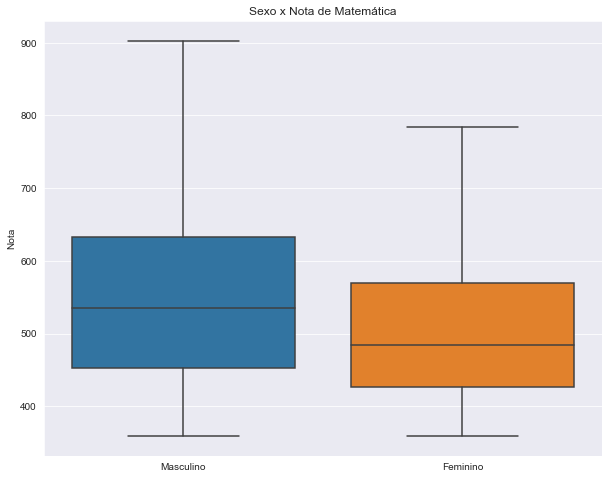

In [17]:
# Análisando nota de matemática
plt.figure(figsize = (10, 8))
sns.boxplot(x = dados.TP_SEXO, y = dados.NU_NOTA_MT, showfliers = False).set_title("Sexo x Nota de Matemática")
plt.xlabel("")
plt.ylabel("Nota")
plt.show()

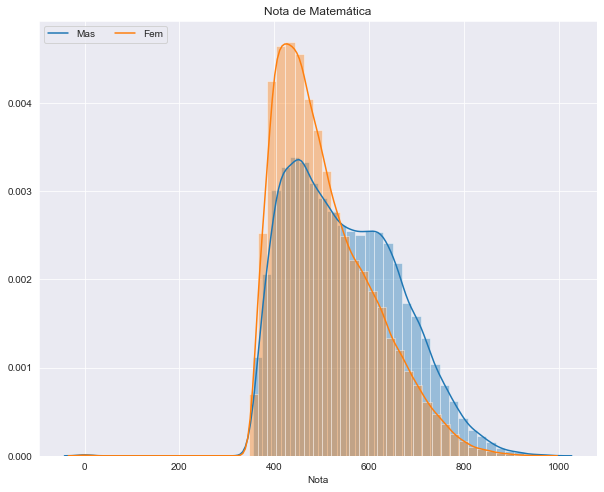

In [18]:
# Verificando distribuição de notas matemática
plt.figure(figsize = (10, 8))
sns.distplot(dados.loc[dados.TP_SEXO == 'Masculino', 'NU_NOTA_MT'], hist = True)
sns.distplot(dados.loc[dados.TP_SEXO == 'Feminino', 'NU_NOTA_MT'], hist = True)
plt.title('Nota de Matemática')
plt.xlabel("Nota")
plt.ylabel("")
plt.legend(labels = ['Mas','Fem'], ncol = 2, loc = 'upper left')
plt.show()

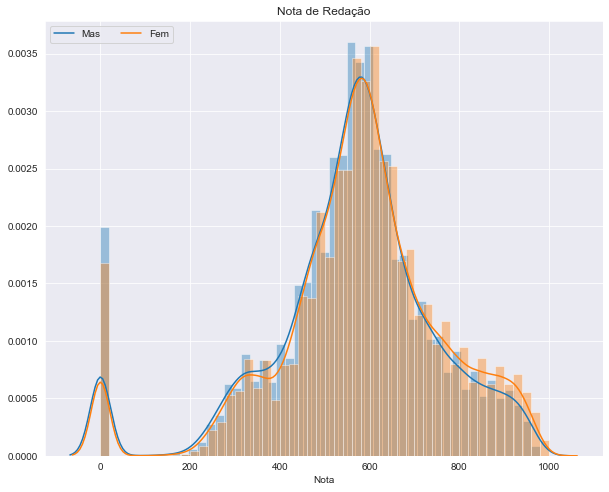

In [19]:
# Verificando distribuição de notas redação
plt.figure(figsize = (10, 8))
sns.distplot(dados.loc[dados.TP_SEXO == 'Masculino', 'NU_NOTA_REDACAO'], hist = True)
sns.distplot(dados.loc[dados.TP_SEXO == 'Feminino', 'NU_NOTA_REDACAO'], hist = True)
plt.title('Nota de Redação')
plt.xlabel("Nota")
plt.ylabel("")
plt.legend(labels = ['Mas','Fem'], ncol = 2, loc = 'upper left')
plt.show()